## 0. Imports

In [1]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.10.1


In [3]:
#Fixing python random seed
random.seed(42)
#fixing numpy random seed
np.random.seed(21)
#fixing tensorflow random seed
tf.compat.v1.random.set_random_seed(42)

## 1. Setup

In [4]:
train_path = './GTSRB/Final_Training/Images'
test_path = './GTSRB/Final_Test/Images'

In [5]:
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [6]:
def readTrafficSignsTrain(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns: DataFrame containing labels, image shapes, ROIs, and image paths'''
    
    # Initialisiere eine leere Liste für die Daten
    data = []

    # loop over all 43 classes
    for c in range(0, 43):
        prefix = f"{rootpath}/{c:05d}/"  # subdirectory for class
        gtFile = open(prefix + f'GT-{c:05d}.csv')  # annotations file
        gtReader = csv.reader(gtFile, delimiter=';')  # csv parser for annotations file
        next(gtReader)  # skip header

        # loop over all images in current annotations file
        for row in gtReader:
            img_path = prefix + row[0]
            img = plt.imread(img_path)  # load image

            label = int(row[7])  # the 8th column is the label
            height = img.shape[0]  # height of the image
            width = img.shape[1]  # width of the image
            #channels = img.shape[2] if len(img.shape) > 2 else 1  # channels of the image (default to 1 if grayscale)
            roi_x1 = int(row[3])  # ROI X1 coordinate
            roi_y1 = int(row[4])  # ROI Y1 coordinate
            roi_x2 = int(row[5])  # ROI X2 coordinate
            roi_y2 = int(row[6])  # ROI Y2 coordinate

            # Füge die Daten als Zeile hinzu
            data.append([width, height, roi_x1, roi_y1, roi_x2, roi_y2, img_path, label])

        gtFile.close()

    # Erstelle ein DataFrame aus der Liste
    df = pd.DataFrame(data, columns=['Width', 'Height','Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'Path', 'Label'])
    return df

In [7]:
def readTrafficSignsTest(rootpath):
    '''Reads the final test data for the German Traffic Sign Recognition Benchmark.
    Arguments: path to the final test data, for example './GTSRB/Final_Test/Images'
    Returns: DataFrame with image data, labels, image shapes, and ROI
    '''
    # Pfad zur CSV-Datei
    csv_file = os.path.join(rootpath, 'GT-final_test_gt.csv')
    
    # Lade die CSV-Datei
    df = pd.read_csv(csv_file, delimiter=';')
    
    # Liste zum Speichern der Daten
    data = []
    
    # Schleife über alle Zeilen der CSV-Datei
    for _, row in df.iterrows():
        img_path = os.path.join(rootpath, row['Filename'])
        img = plt.imread(img_path)  # Lade das Bild
        
        if img is not None:
            label = int(row['ClassId'])
            height, width, channels = img.shape
            roi_x1 = int(row['Roi.X1'])
            roi_y1 = int(row['Roi.Y1'])
            roi_x2 = int(row['Roi.X2'])
            roi_y2 = int(row['Roi.Y2'])
            
            # Füge die Daten als Zeile hinzu
            data.append([width, height, roi_x1, roi_y1, roi_x2, roi_y2, img_path, label])
        else:
            print(f"Bild {img_path} konnte nicht geladen werden.")
    
    # Erstelle ein DataFrame aus der Liste
    df_test = pd.DataFrame(data, columns=['Width', 'Height','Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'Path', 'Label'])
    return df_test

In [8]:
df_train_raw = readTrafficSignsTrain(train_path)
df_test_raw = readTrafficSignsTest(test_path)

In [9]:
df_train_raw.info()
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Width   39209 non-null  int64 
 1   Height  39209 non-null  int64 
 2   Roi.X1  39209 non-null  int64 
 3   Roi.Y1  39209 non-null  int64 
 4   Roi.X2  39209 non-null  int64 
 5   Roi.Y2  39209 non-null  int64 
 6   Path    39209 non-null  object
 7   Label   39209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Width   12630 non-null  int64 
 1   Height  12630 non-null  int64 
 2   Roi.X1  12630 non-null  int64 
 3   Roi.Y1  12630 non-null  int64 
 4   Roi.X2  12630 non-null  int64 
 5   Roi.Y2  12630 non-null  int64 
 6   Path    12630 non-null  object
 7   Label   12630 non-null  int64 
dtypes: int64(

In [10]:
df_train_raw.head(3)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,Path,Label
0,29,30,5,6,24,25,./GTSRB/Final_Training/Images/00000/00000_0000...,0
1,30,30,5,5,25,25,./GTSRB/Final_Training/Images/00000/00000_0000...,0
2,30,30,5,5,25,25,./GTSRB/Final_Training/Images/00000/00000_0000...,0


In [73]:
df_test_raw.head(3)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,Path,Label
0,53,54,6,5,48,49,./GTSRB/Final_Test/Images\00000.ppm,16
1,42,45,5,5,36,40,./GTSRB/Final_Test/Images\00001.ppm,1
2,48,52,6,6,43,47,./GTSRB/Final_Test/Images\00002.ppm,38


In [11]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train = df_train_raw
df_test = df_test_raw

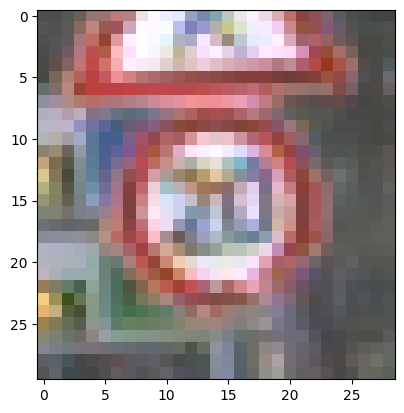

In [12]:
# Ein Bild aus dem DataFrame laden und anzeigen
image = plt.imread(df_train['Path'][0])

plt.imshow(image)
plt.show()

## 2. Preprocessing

In [28]:
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image, ImageEnhance

In [14]:
IMG_WIDTH = 48
IMG_HEIGHT = 48

N_CHANNELS = 3
BATCH_SIZE = 32
N_EPOCHS = 50
VAL_BATCH_SIZE = 32
CLASS_NAMES = list(range(43))
N_CLASSES = 43

In [29]:
# Bildvorverarbeitungsfunktion
def preprocess_image(image_path, roi, target_size):
    # Lade das Bild
    img = cv2.imread(image_path)
    if img is None:
        return None, None
    
    # Konvertiere von BGR zu RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Originalgröße des Bildes
    original_height, original_width = img_rgb.shape[:2]
    
    # Skaliere das Bild auf die Zielgröße
    img_resized = cv2.resize(img_rgb, target_size)
    
    # Berechne die Skalierungsfaktoren
    scale_x = target_size[0] / original_width
    scale_y = target_size[1] / original_height
    
    # Skalierte Bounding Box Koordinaten
    roi_rescaled = [
        int(roi[0] * scale_x), int(roi[1] * scale_y), 
        int(roi[2] * scale_x), int(roi[3] * scale_y)
    ]
    
    # Verschärfe das Bild
    img_pil = Image.fromarray(img_resized)
    enhancer = ImageEnhance.Sharpness(img_pil)
    img_sharpened = enhancer.enhance(2.0)  # Erhöhe die Schärfe
    
    # Konvertiere das Bild zurück zu einem NumPy-Array
    img_sharpened = np.array(img_sharpened)
    
    return img_sharpened, roi_rescaled

In [25]:
image_path = df_train['Path']
roi = [df_train['Roi.X1'], df_train['Roi.Y1'], df_train['Roi.X2'], df_train['Roi.Y2']]
processed_image, processed_roi = preprocess_image(image_path[0], roi, (IMG_WIDTH, IMG_HEIGHT))

TypeError: cannot convert the series to <class 'int'>

In [26]:
df_roi = df_train.iloc[:, 2:-2].values[0]  # Werte der ROI
df_path = df_train.iloc[0, 6]  # Einzelner Pfad als String

In [20]:
df_roi = df_train.iloc[:, 2:-2]
df_path = df_train.iloc[:, 6:-1]

In [30]:

processed_image, processed_roi = preprocess_image(df_path, df_roi, (IMG_WIDTH, IMG_HEIGHT))

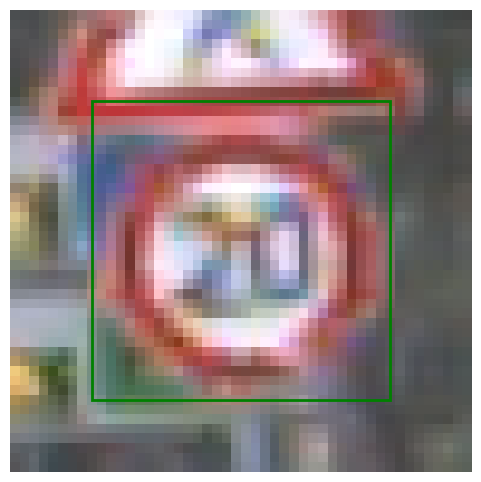

In [31]:
# Visualisierung des vorverarbeiteten Bildes mit Bounding Box
def display_image_with_bbox(image, roi):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.gca().add_patch(plt.Rectangle(
        (roi[0], roi[1]), roi[2] - roi[0], roi[3] - roi[1],
        edgecolor='green', facecolor='none', linewidth=2
    ))
    plt.axis('off')
    plt.show()

display_image_with_bbox(processed_image, processed_roi)

In [ ]:
# Ein Bild aus dem DataFrame laden und anzeigen
image = plt.imread(df_train['Path'][0])

plt.imshow(image)
plt.show()

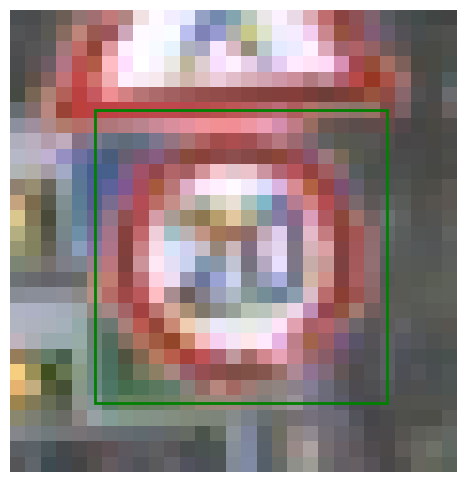

In [34]:
display_image_with_bbox(plt.imread(df_train['Path'][0]), df_roi)

In [57]:
image = plt.imread(df_train['Path'][0])

In [58]:



# Verschärfe das Bild
img_pil = Image.fromarray(image)
enhancer = ImageEnhance.Sharpness(img_pil)
img_sharpened = enhancer.enhance(2.0)  # Erhöhe die Schärfe

# Konvertiere das Bild zurück zu einem NumPy-Array
img_sharpened = np.array(img_sharpened)

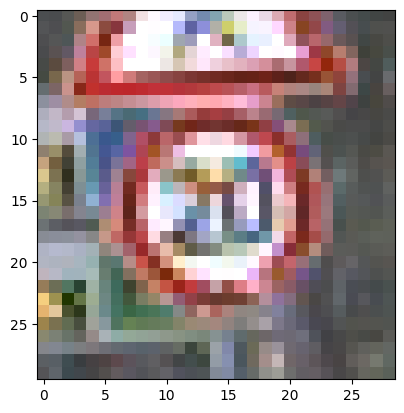

In [59]:
plt.imshow(img_sharpened)
plt.show()

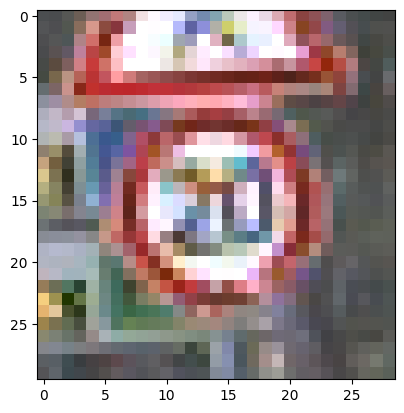

In [46]:
image = plt.imread(df_train['Path'][0])

img_pil = Image.fromarray(image)
enhancer = ImageEnhance.Sharpness(img_pil)
img_sharpened = enhancer.enhance(2.0)  # Erhöhe die Schärfe

# Konvertiere das Bild zurück zu einem NumPy-Array
img_sharpened = np.array(img_sharpened)

plt.imshow(img_sharpened)
plt.show()

In [76]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [78]:
# Aufteilung in Trainings- und Validierungsset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Überprüfe die Aufteilung
print("Anzahl der Trainingsdaten:", len(X_train))
print("Anzahl der Validierungsdaten:", len(X_val))

Anzahl der Trainingsdaten: 31367
Anzahl der Validierungsdaten: 7842


In [80]:
#Updating coordinates
for idx, row in X.iterrows() :
  w = row['Width']
  h = row['Height']
  if w > IMG_WIDTH :
    diff = w-IMG_WIDTH
    X.iloc[idx, 4] = X.iloc[idx]['Roi.X2'] - diff
  else :
    diff = IMG_WIDTH-w
    X.iloc[idx, 4] = X.iloc[idx]['Roi.X2'] + diff
  if h > IMG_HEIGHT :
    diff = h - IMG_HEIGHT
    X.iloc[idx, 5] = X.iloc[idx]['Roi.Y2'] - diff
  else :
    diff = IMG_HEIGHT - h
    X.iloc[idx, 5] = X.iloc[idx]['Roi.Y2'] + diff

In [97]:
from object_detection.utils import dataset_util
from PIL import Image
import io

In [112]:
def create_tf_example(row):
    img_path = row['Path']
    # Lade das Bild und konvertiere es in ein kompatibles Format (z.B. JPEG)
    image = Image.open(img_path)
    image = image.convert("RGB")
    with io.BytesIO() as output:
        image.save(output, format="JPEG")
        encoded_jpg = output.getvalue()

    width, height = image.size

    filename = row['Path'].encode('utf8')
    image_format = b'jpeg'  # Ändere dies entsprechend des konvertierten Bildformats
    xmins = [row['Roi.X1'] / width]
    xmaxs = [row['Roi.X2'] / width]
    ymins = [row['Roi.Y1'] / height]
    ymaxs = [row['Roi.Y2'] / height]
    classes_text = [str(row['Label']).encode('utf8')]
    classes = [int(row['Label'])]

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[height])),
        'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[width])),
        'image/filename': tf.train.Feature(bytes_list=tf.train.BytesList(value=[filename])),
        'image/source_id': tf.train.Feature(bytes_list=tf.train.BytesList(value=[filename])),
        'image/encoded': tf.train.Feature(bytes_list=tf.train.BytesList(value=[encoded_jpg])),
        'image/format': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_format])),
        'image/object/bbox/xmin': tf.train.Feature(float_list=tf.train.FloatList(value=xmins)),
        'image/object/bbox/xmax': tf.train.Feature(float_list=tf.train.FloatList(value=xmaxs)),
        'image/object/bbox/ymin': tf.train.Feature(float_list=tf.train.FloatList(value=ymins)),
        'image/object/bbox/ymax': tf.train.Feature(float_list=tf.train.FloatList(value=ymaxs)),
        'image/object/class/text': tf.train.Feature(bytes_list=tf.train.BytesList(value=classes_text)),
        'image/object/class/label': tf.train.Feature(int64_list=tf.train.Int64List(value=classes)),
    }))
    return tf_example

In [113]:
def create_tf_record(df, output_path):
    writer = tf.io.TFRecordWriter(output_path)
    for index, row in df.iterrows():
        tf_example = create_tf_example(row)
        writer.write(tf_example.SerializeToString())
    writer.close()

In [ ]:
X_train.iloc[:,-1]

In [123]:
create_tf_record(df_train, 'train.record')
#create_tf_record(X_val, 'val.record')

In [108]:
def parse_tf_example(serialized_example):
    feature_description = {
        'image/height': tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
        'image/filename': tf.io.FixedLenFeature([], tf.string),
        'image/source_id': tf.io.FixedLenFeature([], tf.string),
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/format': tf.io.FixedLenFeature([], tf.string),
        'image/object/bbox/xmin': tf.io.FixedLenFeature([], tf.float32),
        'image/object/bbox/xmax': tf.io.FixedLenFeature([], tf.float32),
        'image/object/bbox/ymin': tf.io.FixedLenFeature([], tf.float32),
        'image/object/bbox/ymax': tf.io.FixedLenFeature([], tf.float32),
        'image/object/class/text': tf.io.FixedLenFeature([], tf.string),
        'image/object/class/label': tf.io.FixedLenFeature([], tf.int64),
    }
    return tf.io.parse_single_example(serialized_example, feature_description)

In [109]:
def read_tfrecord(record_file):
    raw_dataset = tf.data.TFRecordDataset(record_file)
    parsed_dataset = raw_dataset.map(parse_tf_example)
    return parsed_dataset

In [127]:
def display_sample_image(parsed_dataset):
    for tf_example in parsed_dataset.take(10):
        height = tf_example['image/height'].numpy()
        width = tf_example['image/width'].numpy()
        encoded_image = tf_example['image/encoded'].numpy()
        xmin = tf_example['image/object/bbox/xmin'].numpy()
        xmax = tf_example['image/object/bbox/xmax'].numpy()
        ymin = tf_example['image/object/bbox/ymin'].numpy()
        ymax = tf_example['image/object/bbox/ymax'].numpy()
        label = tf_example['image/object/class/label'].numpy()

        image = tf.image.decode_jpeg(encoded_image)
        image_np = image.numpy()

        plt.figure(figsize=(4, 4))
        plt.imshow(image_np)
        plt.title(f'Label: {label}')

        # Zeichne die Bounding Box
        plt.gca().add_patch(plt.Rectangle((xmin * width, ymin * height), (xmax - xmin) * width, (ymax - ymin) * height,
                                          edgecolor='green', facecolor='none', linewidth=2))
        plt.axis('off')
        plt.show()

In [130]:
def display_image_at_index(parsed_dataset, index):
    for i, tf_example in enumerate(parsed_dataset):
        if i == index:
            height = tf_example['image/height'].numpy()
            width = tf_example['image/width'].numpy()
            encoded_image = tf_example['image/encoded'].numpy()
            xmin = tf_example['image/object/bbox/xmin'].numpy()
            xmax = tf_example['image/object/bbox/xmax'].numpy()
            ymin = tf_example['image/object/bbox/ymin'].numpy()
            ymax = tf_example['image/object/bbox/ymax'].numpy()
            label = tf_example['image/object/class/label'].numpy()

            image = tf.image.decode_jpeg(encoded_image)
            image_np = image.numpy()

            plt.figure(figsize=(4, 4))
            plt.imshow(image_np)
            plt.title(f'Label: {label}')

            # Draw the bounding box
            plt.gca().add_patch(plt.Rectangle((xmin * width, ymin * height), 
                                              (xmax - xmin) * width, (ymax - ymin) * height,
                                              edgecolor='green', facecolor='none', linewidth=2))
            plt.axis('off')
            plt.show()
            break

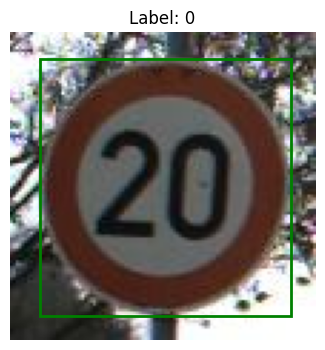

In [131]:
parsed_dataset = read_tfrecord('train.record')
#display_sample_image(parsed_dataset)
display_image_at_index(parsed_dataset, 88)

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
Updating files:  15% (586/3717)
Updating files:  16% (595/3717)
Updating files:  17% (632/3717)
Updating files:  18% (670/3717)
Updating files:  19% (707/3717)
Updating files:  20% (744/3717)
Updating files:  21% (781/3717)
Updating files:  22% (818/3717)
Updating files:  23% (855/3717)
Updating files:  24% (893/3717)
Updating files:  25% (930/3717)
Updating files:  26% (967/3717)
Updating files:  27% (1004/3717)
Updating files:  28% (1041/3717)
Updating files:  29% (1078/3717)
Updating files:  30% (1116/3717)
Updating files:  31% (1153/3717)
Updating files:  32% (1190/3717)
Updating files:  33% (1227/3717)
Updating files:  34% (1264/3717)
Updating files:  35% (1301/3717)
Updating files:  36% (1339/3717)
Updating files:  37% (1376/3717)
Updating files:  38% (1413/3717)
Updating files:  39% (1450/3717)
Updating files:  40% (1487/3717)
Updating files:  40% (1523/3717)
Updating files:  41% (1524/3717)
Updating files:  42% (1562/3717)
Updating files:  43% (1599/371

In [2]:
cd models/research  

c:\Users\Alexej\Desktop\GTSRB\models\research


In [6]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk

Der Befehl "apt-get" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [6]:
!protoc object_detection/protos/*.proto --python_out=.

Der Befehl "protoc" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [6]:
pip install -r ./models/research/object_detection/packages/tf2/setup.py

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '"""Setup script for object_detection with TF2.0."""' (from line 1 of ./models/research/object_detection/packages/tf2/setup.py)


In [7]:
!python models/research/object_detection/builders/model_builder_tf2_test.py

Traceback (most recent call last):
  File "c:\Users\Alexej\Desktop\GTSRB\models\research\object_detection\builders\model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "c:\Users\Alexej\miniconda3\envs\tf-keras\lib\site-packages\object_detection\builders\model_builder.py", line 22, in <module>
    from object_detection.builders import box_predictor_builder
  File "c:\Users\Alexej\miniconda3\envs\tf-keras\lib\site-packages\object_detection\builders\box_predictor_builder.py", line 20, in <module>
    from object_detection.predictors import convolutional_box_predictor
  File "c:\Users\Alexej\miniconda3\envs\tf-keras\lib\site-packages\object_detection\predictors\convolutional_box_predictor.py", line 22, in <module>
    slim = tf.contrib.slim
AttributeError: module 'tensorflow' has no attribute 'contrib'
